In [100]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
%matplotlib inline
from sklearn.utils import shuffle
import matplotlib.image as mpimg
import tensorflow as tf
from skimage.transform import resize
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split

In [101]:
fpP = "../data/Parasitized/"
fpU = "../data/Uninfected/"

In [102]:
dataP = []
count = 0
for filename in os.listdir(fpP):
    if '.png' in filename:
        count += 1
        if count>100:
            break
        print(filename)
        dataP.append(resize(mpimg.imread(fpP+filename), (199,199,3)))
        


C33P1thinF_IMG_20150619_114756a_cell_179.png
C33P1thinF_IMG_20150619_114756a_cell_180.png
C33P1thinF_IMG_20150619_114756a_cell_181.png
C33P1thinF_IMG_20150619_114756a_cell_182.png
C33P1thinF_IMG_20150619_115740a_cell_161.png
C33P1thinF_IMG_20150619_115740a_cell_162.png
C33P1thinF_IMG_20150619_115740a_cell_163.png
C33P1thinF_IMG_20150619_115808a_cell_205.png


In [103]:
dataU = []
count = 0
for filename in os.listdir(fpU):
    if '.png' in filename:
        count+=1
        if count>100:
            break
        print(filename)
        dataU.append(resize(mpimg.imread(fpU+filename), (199, 199, 3)))

C1_thinF_IMG_20150604_104722_cell_115.png
C1_thinF_IMG_20150604_104722_cell_15.png
C1_thinF_IMG_20150604_104722_cell_60.png
C1_thinF_IMG_20150604_104722_cell_66.png
C1_thinF_IMG_20150604_104722_cell_73.png
C1_thinF_IMG_20150604_104722_cell_79.png
C1_thinF_IMG_20150604_104722_cell_81.png
C1_thinF_IMG_20150604_104722_cell_9.png


In [104]:
dataP = np.array(dataP)
dataU = np.array(dataU)

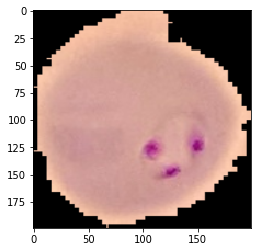

In [105]:
plt.imshow(dataP[0])


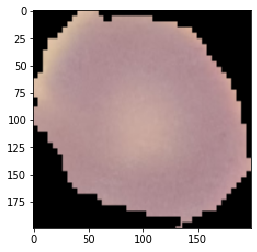

In [106]:
plt.imshow(dataU[0])

In [107]:
# Merge data
p = np.ones(dataP.shape[0])
u = np.zeros(dataU.shape[0])
X = np.concatenate((dataP, dataU))
y = np.concatenate((p, u))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize image vectors
X_train = X_train/255.
X_test = X_test/255.

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 10
number of test examples = 6
X_train shape: (10, 199, 199, 3)
y_train shape: (10,)
X_test shape: (6, 199, 199, 3)
y_test shape: (6,)


In [108]:
img_height,img_width = 199,199 
num_classes = 1
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights= None,
                                            include_top=False,
                                            input_shape= (img_height,img_width,3))

In [109]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [110]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
len(y_train)

10

In [ ]:
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
10/10 [==============================] - 72s 7s/step - loss: 7.9712 - acc: 0.5000
Epoch 2/100
10/10 [==============================] - 6s 598ms/step - loss: 7.9712 - acc: 0.5000
Epoch 3/100
10/10 [==============================] - 6s 611ms/step - loss: 7.9712 - acc: 0.5000
Epoch 4/100
10/10 [==============================] - 6s 618ms/step - loss: 7.9712 - acc: 0.5000
Epoch 5/100
10/10 [==============================] - 6s 626ms/step - loss: 7.9712 - acc: 0.5000
Epoch 6/100
10/10 [==============================] - 6s 625ms/step - loss: 7.9712 - acc: 0.5000
Epoch 7/100
10/10 [==============================] - 6s 631ms/step - loss: 7.9712 - acc: 0.5000
Epoch 8/100
10/10 [==============================] - 6s 610ms/step - loss: 7.9712 - acc: 0.5000
Epoch 9/100
10/10 [==============================] - 7s 671ms/step - loss: 7.9712 - acc: 0.5000
Epoch 10/100
10/10 [==============================] - 6s 565ms/step - loss: 7.9712 - acc: 0.5000
Epoch 11/100
10/10 [=====================